## Testando Watershad

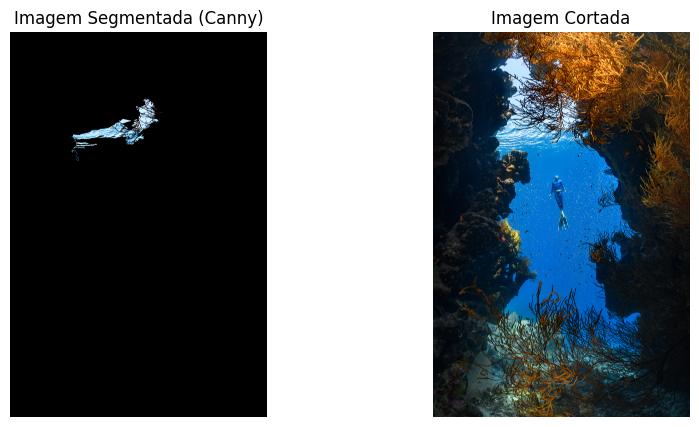

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🖼️ Carregar a imagem
img = cv2.imread('no_plasic (1).jpg')
img_original = img.copy()

# 🔄 Converter para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 🔍 Aplicar Canny para detecção de bordas
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

# 💡 (Opcional) Dilatar as bordas para garantir contornos fechados
kernel = np.ones((3, 3), np.uint8)
edges_dilated = cv2.dilate(edges, kernel, iterations=1)

# 🧠 Encontrar contornos
contours, _ = cv2.findContours(edges_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Selecionar o maior contorno
    cnt = max(contours, key=cv2.contourArea)

    # 🎯 Criar máscara do contorno
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [cnt], -1, 255, -1)  # Preencher o contorno

    # 🩹 Aplicar a máscara na imagem original
    result = cv2.bitwise_and(img_original, img_original, mask=mask)

    # ✂️ Crop na região do objeto
    x, y, w, h = cv2.boundingRect(cnt)
    cropped = result[y:y+h, x:x+w]

    # 🖼️ Mostrar os resultados
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Imagem Segmentada (Canny)')
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Imagem Cortada')
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

else:
    print("Nenhum contorno encontrado!")
